# Cylindrical Lens

In [136]:
import optiland.backend as be
from optiland.optic import Optic
from optiland.materials import IdealMaterial
from optiland.rays import RealRays

class CylindricalLens(Optic):
    def __init__(self):
        super().__init__()
        
        self.add_surface(index=0, thickness=be.inf)
        self.add_surface(
            index=1,
            surface_type="toroidal",
            thickness=5.0,
            material=IdealMaterial(n=1.5, k=0),
            is_stop=True,
            radius=1000000,
            radius_y=8,
        )
        self.add_surface(index=2, thickness=10.0, material="air")
        self.add_surface(index=3)
        
        self.set_aperture(aperture_type="EPD", value=10.0)
        self.add_wavelength(value=0.550, is_primary=True)
        self.set_field_type("angle")
        self.add_field(y=0)

        
        

In [137]:
lens = CylindricalLens()

In [138]:
lens.trace(Hx=0, Hy=0, wavelength=0.550, distribution="hexapolar")

In [139]:
x_coords = be.linspace(-5.0, 5.0, 5)
x_in_yfan = x_coords
y_in_yfan = be.zeros(5)
z_in_yfan = be.array([0] * 5)
L_in_yfan = be.zeros(5)
M_in_yfan = be.zeros(5)
N_in_yfan = be.ones(5)
intensity_yfan = be.ones(5)
rays_in_yfan = RealRays(x=x_in_yfan, y=y_in_yfan, z=z_in_yfan,
                        L=L_in_yfan, M=M_in_yfan, N=N_in_yfan,
                        wavelength=0.550, intensity=intensity_yfan)

# Trace Y-Fan Rays
rays_out_yfan = lens.surface_group.trace(rays_in_yfan)

num_surfaces = lens.surface_group.num_surfaces

# take intersection points on last surface only
x_image = lens.surface_group.x[num_surfaces - 1, :]
y_image = lens.surface_group.y[num_surfaces - 1, :]

print(x_image)

[-4.99996667 -2.49998333  0.          2.49998333  4.99996667]


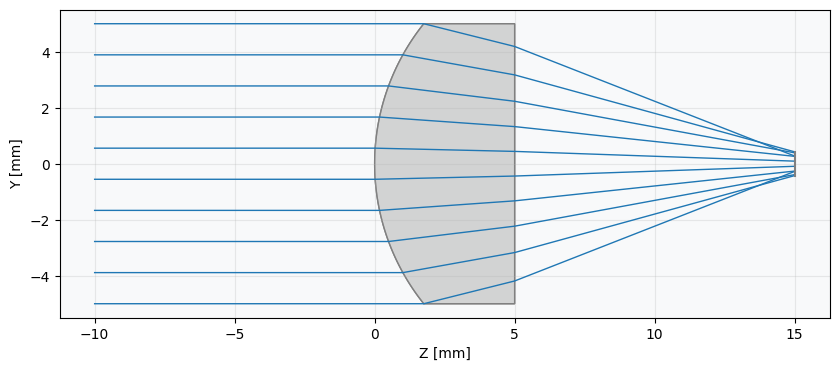

In [140]:
lens.draw(num_rays=10, )

In [141]:
lens.draw3D(num_rays=50)

In [142]:
from optiland.analysis import SpotDiagram

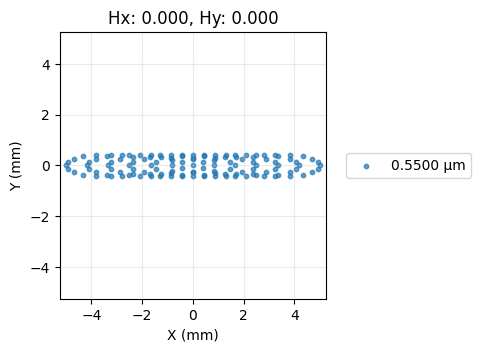

In [143]:
sd = SpotDiagram(lens)
sd.view()